# Postwork 1.

**Estimados de Locación y Variabilidad**

La actividad consiste en lo siguiente:

- Identifica las columnas de tu dataset que tengan datos numéricos.
- Identifica la relevancia de esas columnas (qué tan importantes son para responder a tus preguntas).
- Obtén los siguientes estimados de tus columnas numéricas:
  - Promedio
  - Mediana
  - Media Truncada
  - Desviación estándar
  - Rango
  - Percentiles 25 y 75 (por lo menos)
  - Rango intercuartil

Comenta qué has aprendido sobre tus datos al estudiar estas medidas.

In [ ]:
#Importamos librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
import numpy as np

In [ ]:
# Activamos la unidad de almacenamiento de Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
crop = pd.read_csv("/content/drive/MyDrive/crop_clean.csv", index_col=0)
crop.head()

,country,year,crop,productivity,quantity,unit
0,Afghanistan,1975,"almonds, with shell",area harvested,0.0,ha
1,Afghanistan,1976,"almonds, with shell",area harvested,5900.0,ha
2,Afghanistan,1977,"almonds, with shell",area harvested,6000.0,ha
3,Afghanistan,1978,"almonds, with shell",area harvested,6000.0,ha
4,Afghanistan,1979,"almonds, with shell",area harvested,6000.0,ha


In [ ]:
animal = pd.read_csv("/content/drive/MyDrive/animal_clean.csv", index_col=0)
animal.head()

,country,year,animal,quantity,unit
0,Afghanistan,1961,asses,1300000.0,head
1,Afghanistan,1962,asses,851850.0,head
2,Afghanistan,1963,asses,1001112.0,head
3,Afghanistan,1964,asses,1150000.0,head
4,Afghanistan,1965,asses,1300000.0,head


In [ ]:
pop = pd.read_csv("/content/drive/MyDrive/pop_clean.csv")
pop.head(2)

,country,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,55434.0,56234.0,56699.0,57029.0,57357.0,57702.0,58044.0,58377.0,58734.0,...,102050.0,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766
1,Africa Eastern and Southern,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,152752671.0,156876454.0,161156430.0,165611760.0,...,532760424.0,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299


Por la estructura de nuestros datos, sólo tenemos una columna numérica y no tiene sentido analizarla puesto que no existe una relación propiamente entre ellos, entonces, analizaremos los datos del cultivo cuya producción identificamos como la más afectada por la pandemia de 2019 y el cultivo menos afectado. Haremos lo mismo para los datos de disponibilidad de animales para consumo.



In [ ]:
from scipy import stats #mediana

def estimados(df,col):
  print(f"Promedio = {df[col].mean():.2f}")
  print(f"Media truncada al 10% = {stats.trim_mean(df[col], 0.1):.2f}")
  print(f"Desviación estándar = {df[col].std():.2f}")
  print(f"Mediana = {df[col].median():.2f}")
  print(f"Rango = {df[col].max()-df[col].min():.2f}")
  print(f"Mínimo = {df[col].quantile(0):.2f}")
  print(f"Percentil 25 = {df[col].quantile(0.25):.2f}")
  print(f"Percentil 75 = {df[col].quantile(0.75):.2f}")
  print(f"Máximo= {df[col].quantile(1):.2f}")
  print(f"Rango intercuantil = {df[col].quantile(0.75) - df[col].quantile(0.25):.2f}")

In [ ]:
worst_crop = crop[crop["crop"]=="sugar beet"]
estimados(worst_crop,'quantity')

Promedio = 1972228.23
Media truncada al 10% = 539838.34
Desviación estándar = 6583082.87
Mediana = 312141.00
Rango = 99872000.00
Mínimo = 0.00
Percentil 25 = 53263.00
Percentil 75 = 661745.00
Máximo= 99872000.00
Rango intercuantil = 608482.00


In [ ]:
best_crop = crop[crop["crop"]=="nuts nes"]
estimados(best_crop,'quantity')

Promedio = 39028.90
Media truncada al 10% = 9529.78
Desviación estándar = 105292.08
Mediana = 5111.00
Rango = 607021.00
Mínimo = 0.00
Percentil 25 = 1100.00
Percentil 75 = 17443.00
Máximo= 607021.00
Rango intercuantil = 16343.00


En ambos cultivos notamos que la media y la media truncada difieren considerablemente, de la misma forma, la media y la mediana también son muy lejanas entre sí, por lo que podríamos pensar en un exceso de datos atípicos o en una distribución asimétrica. La desviación estándar es muy grande en ambos casos. De la misma forma, el rango intercuantil es muy pequeño comparado con el rango, pero esto se debe a los valores 0, que significa que no hubo producción en algún año, por lo que en este caso los percentiles serían de mayor utilidad, que en ambos casos el percentil 75 es bastante menor que el máximo.

In [ ]:
worst_animal = animal[animal["animal"]=="buffaloes"]
estimados(worst_animal,'quantity')

Promedio = 4160868.18
Media truncada al 10% = 848843.77
Desviación estándar = 13819053.12
Mediana = 193000.00
Rango = 110361500.00
Mínimo = 0.00
Percentil 25 = 4700.00
Percentil 75 = 2018000.00
Máximo= 110361500.00
Rango intercuantil = 2013300.00


In [ ]:
best_animal = animal[animal["animal"]=="goats"]
estimados(best_animal,'quantity')

Promedio = 4318072.37
Media truncada al 10% = 1194986.80
Desviación estándar = 15334271.59
Mediana = 421782.00
Rango = 152219142.00
Mínimo = 0.00
Percentil 25 = 32000.00
Percentil 75 = 2300000.00
Máximo= 152219142.00
Rango intercuantil = 2268000.00


El caso de los animales es bastante similar, promedio y media truncada bastante diferentes, la mediana es lejana tanto a la media como a la media truncada, una desviación estándar grande. Nuevamente el rango intercuantil es notablemente más pequeño que el rango, pero más en el caso de los búfalos, que fueron los únicos animales cuya disponibilidad se redujo durante el 2020. El rango es igual al máximo por los ceros y el percentil 75 es bastante menor que el máximo.

# Postwork 2

**Introducción a la visualización de datos: Distribuciones**

Realiza los siguientes procesos en los casos en los que tenga sentido aplicarlos:

- Utiliza boxplots para analizar la distribución de tus variables numéricas. Piensa acerca de cuáles son los valores típicos y atípicos y dónde están concentrados el grueso de tus datos.
- Utiliza el Score de Rango Intercuartílico para filtrar tus valores atípicos. Compara tus medianas, medias y desviaciones estándares antes y después de realizar la filtración y ve cuánto cambiaron.
- Utiliza tablas de frecuencia e histogramas para observar la distribución de tus variables. Caracteriza cada una de las distribuciones usando los términos que aprendiste durante la sesión. Obtén medidas de asimetría y curtosis para ver qué tan alejadas de la distribución normal están tus variables.
- Utiliza gráficas de densidad para comparar una variable numérica que pueda ser segmentada en dos o más categorías. Usa esta técnica para entender mejor cómo están distribuidos tus datos en cada uno de los grupos presentes.

Analizaremos la distribución de las variables númericas que nos aportan más información: `sugar beet` y `nuts nes` (dataset de cultivos), que son los cultivos con menor y mayor estabilidad durante la pandemia; y `buffaloes` y `goats` (dataset de animales), que son los animales con menor y mayor disponibilidad para consumo.

In [ ]:
def medidas(data):
  import pandas as pd
  print("Media: ", data.mean())
  print("Mediana: ", data.median())
  print("Desviación estándar: ", data.std())

In [ ]:
def filtrar_va(data, score):
  iqr = data.quantile(0.75) - data.quantile(0.25)
  filtro_inferior = data > data.quantile(0.25) - (iqr * score)
  filtro_superior = data < data.quantile(0.75) + (iqr * score)
  df_filtrado = data[filtro_inferior & filtro_superior]

  return df_filtrado

Partimos del cultivo con la menor estabilidad:

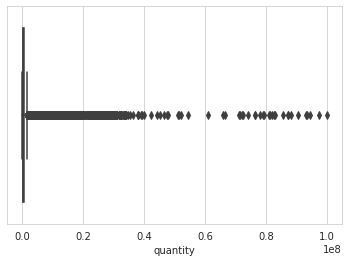

In [ ]:
sns.set_style("whitegrid")
worst_crop_col=worst_crop['quantity']
sns.boxplot(x=worst_crop_col);

In [ ]:
medidas(worst_crop_col)

Media:  1972228.2332489404
Mediana:  312141.0
Desviación estándar:  6583082.865473298


Como podemos ver, la desviación estándar de `sugar beet` es muy grande, por lo tanto, eliminaremos los valores atípicos que también podemos observar en el boxplot.

In [ ]:
worst_crop_fil=filtrar_va(worst_crop_col, 0.6)

In [ ]:
medidas(worst_crop_fil)

Media:  252686.43687609566
Mediana:  197000.0
Desviación estándar:  240579.33204308833


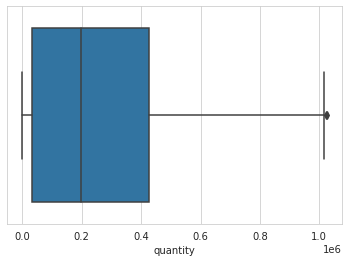

In [ ]:
sns.boxplot(x=worst_crop_fil);

Ya hemos eliminado los valores atípicos de nuestra variable del menor cultivo, lo cual se comprueba en el cambio de la media y la desviación estándar. Aunque, los valores siguen estando un poco alejados de la media.

Hacemos lo mismo con las variables restantes:

Media:  39028.89920375405
Mediana:  5111.0
Desviación estándar:  105292.07920316143


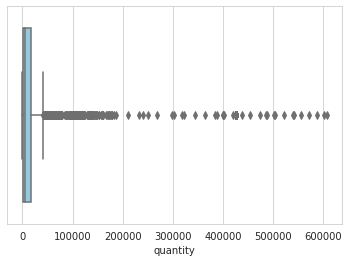

In [ ]:
best_crop_col=best_crop['quantity']
sns.boxplot(x=best_crop_col, color='skyblue');
medidas(best_crop_col)

Media:  5630.312286435894
Mediana:  2701.0
Desviación estándar:  6214.715661929282


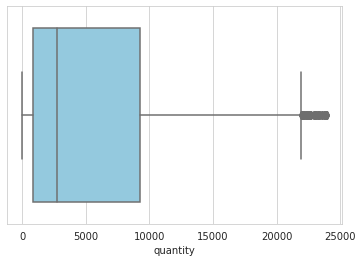

In [ ]:
best_crop_fil=filtrar_va(best_crop_col, 0.4)
medidas(best_crop_fil)
sns.boxplot(x=best_crop_fil, color='skyblue');

Media:  4160868.1791377137
Mediana:  193000.0
Desviación estándar:  13819053.12161414


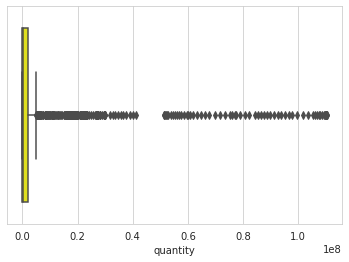

In [ ]:
worst_animal_col=worst_animal['quantity']
sns.boxplot(x=worst_animal_col, color='yellow');
medidas(worst_animal_col)

Media:  490871.95679921453
Mediana:  65388.0
Desviación estándar:  804161.3859433553


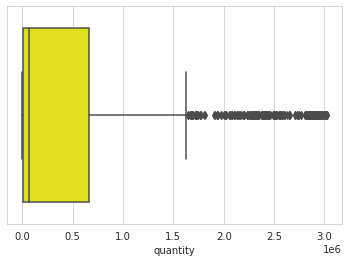

In [ ]:
worst_animal_fil=filtrar_va(worst_animal_col, 0.5)
medidas(worst_animal_fil)
sns.boxplot(x=worst_animal_fil, color='yellow');

Media:  4318072.366093255
Mediana:  421782.0
Desviación estándar:  15334271.587800138


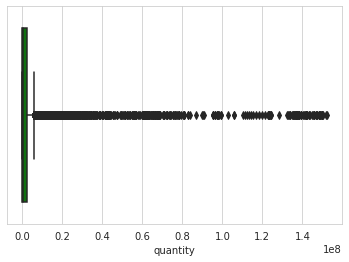

In [ ]:
best_animal_col=best_animal['quantity']
sns.boxplot(x=best_animal_col, color='green');
medidas(best_animal_col)

Media:  593564.8797376294
Mediana:  158000.0
Desviación estándar:  833301.9640848585


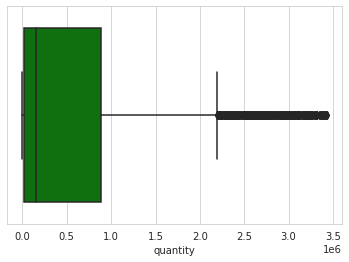

In [ ]:
best_animal_fil=filtrar_va(best_animal_col, 0.5)
medidas(best_animal_fil)
sns.boxplot(x=best_animal_fil, color='green');

Algunas variables siguen presentando mucha dispersión en los datos después de eliminar los valores atípicos. Por otro lado, hay que considerar que estamos hablando de la cantidad de cultivos y animales disponibles a lo largo del tiempo, por lo cual, no es de sorprendernos que tengamos valores grandes en la media y en la desviación estándar. Además, es normal que con el tiempo la producción y la disponibilidad vayan aumentando.

Ahora vamos a generar las tablas de frecuencias de nuestros datos, con el fin de conocer que valores podemos descartar de nuestras variables y mejorar la limpieza:

In [ ]:
# Calculamos el rango
worst_crop_col.max() - worst_crop_col.min()

99872000.0

In [ ]:
# Dividimos los datos en segmentos y hacemos el conteo de los que pertenecen a cada grupo
segmentos = pd.cut(worst_crop_col, 25)
worst_crop_col.groupby(segmentos).count()

quantity
(-99872.0, 3994880.0]       7944
(3994880.0, 7989760.0]       349
(7989760.0, 11984640.0]      151
(11984640.0, 15979520.0]     122
(15979520.0, 19974400.0]      51
(19974400.0, 23969280.0]      39
(23969280.0, 27964160.0]      58
(27964160.0, 31959040.0]      48
(31959040.0, 35953920.0]      20
(35953920.0, 39948800.0]       7
(39948800.0, 43943680.0]       1
(43943680.0, 47938560.0]       5
(47938560.0, 51933440.0]       3
(51933440.0, 55928320.0]       1
(55928320.0, 59923200.0]       0
(59923200.0, 63918080.0]       1
(63918080.0, 67912960.0]       2
(67912960.0, 71907840.0]       2
(71907840.0, 75902720.0]       3
(75902720.0, 79897600.0]       5
(79897600.0, 83892480.0]       5
(83892480.0, 87887360.0]       3
(87887360.0, 91882240.0]       2
(91882240.0, 95877120.0]       3
(95877120.0, 99872000.0]       2
Name: quantity, dtype: int64

Aquí podemos ver que los datos de interés podrían estar en el rango de -99872.0 a 35953920.0, por lo tanto, podríamos eliminar los datos menores que 0 y los datos apartir de los 35953920.0 cultivos.

In [ ]:
best_crop_col.max() - best_crop_col.min()

607021.0

In [ ]:
segmentos = pd.cut(best_crop_col, 15)
best_crop_col.groupby(segmentos).count()

quantity
(-607.021, 40468.067]       7254
(40468.067, 80936.133]       352
(80936.133, 121404.2]         78
(121404.2, 161872.267]        48
(161872.267, 202340.333]      11
(202340.333, 242808.4]         3
(242808.4, 283276.467]         2
(283276.467, 323744.533]       4
(323744.533, 364212.6]         1
(364212.6, 404680.667]         6
(404680.667, 445148.733]     520
(445148.733, 485616.8]         3
(485616.8, 526084.867]         4
(526084.867, 566552.933]       3
(566552.933, 607021.0]         4
Name: quantity, dtype: int64

En `best_crop` contamos con muy poquitos datos desde 202340.333 en adelante, aunque no podríamos eliminarlos debido a que perderíamos información valiosa en el rango de 404680.667 a 445148.73. Pero nuevamente podríamos prescindir de las cantidades negativas.

In [ ]:
worst_animal_col.max() - worst_animal_col.min()

110361500.0

In [ ]:
segmentos = pd.cut(worst_animal_col, 30)
worst_animal_col.groupby(segmentos).count()

quantity
(-110361.5, 3678716.667]          2133
(3678716.667, 7357433.333]          84
(7357433.333, 11036150.0]           23
(11036150.0, 14714866.667]          12
(14714866.667, 18393583.333]        32
(18393583.333, 22072300.0]          34
(22072300.0, 25751016.667]          35
(25751016.667, 29429733.333]        25
(29429733.333, 33108450.0]           7
(33108450.0, 36787166.667]           4
(36787166.667, 40465883.333]         3
(40465883.333, 44144600.0]           1
(44144600.0, 47823316.667]           0
(47823316.667, 51502033.333]         2
(51502033.333, 55180750.0]           6
(55180750.0, 58859466.667]           5
(58859466.667, 62538183.333]         4
(62538183.333, 66216900.0]           3
(66216900.0, 69895616.667]           2
(69895616.667, 73574333.333]         2
(73574333.333, 77253050.0]           3
(77253050.0, 80931766.667]           3
(80931766.667, 84610483.333]         2
(84610483.333, 88289200.0]           3
(88289200.0, 91967916.667]           3
(91967916.667, 9

La mayor cantidad de información de `worst_animal` está concentrada en la primer división de la tabla de frecuencias (-110361.5 a 3678716.667), por lo que podríamos eliminar datos de las demás divisiones y los menos a cero.

In [ ]:
best_animal_col.max() - best_animal_col.min()

152219142.0

In [ ]:
segmentos = pd.cut(best_animal_col, 30)
best_animal_col.groupby(segmentos).count()

quantity
(-152219.142, 5073971.4]      8871
(5073971.4, 10147942.8]        690
(10147942.8, 15221914.2]       269
(15221914.2, 20295885.6]       142
(20295885.6, 25369857.0]        57
(25369857.0, 30443828.4]        53
(30443828.4, 35517799.8]        30
(35517799.8, 40591771.2]        17
(40591771.2, 45665742.6]        20
(45665742.6, 50739714.0]        10
(50739714.0, 55813685.4]        16
(55813685.4, 60887656.8]        18
(60887656.8, 65961628.2]        33
(65961628.2, 71035599.6]        26
(71035599.6, 76109571.0]        11
(76109571.0, 81183542.4]        14
(81183542.4, 86257513.8]         3
(86257513.8, 91331485.2]         4
(91331485.2, 96405456.6]         5
(96405456.6, 101479428.0]        7
(101479428.0, 106553399.4]       3
(106553399.4, 111627370.8]       2
(111627370.8, 116701342.2]       5
(116701342.2, 121775313.6]       3
(121775313.6, 126849285.0]      11
(126849285.0, 131923256.4]       1
(131923256.4, 136997227.8]      16
(136997227.8, 142071199.2]      20
(142071199.

En `best_animal` los datos considerables están contenidos en las primeras divisiones. Sin embargo, podemos observar que tenemos datos importantes en las últimas divisiones (apartir de 121775313.6), lo cual coincide con la disponibilidad de las cabras durante la pandemia.

A continuación, vamos a ver qué tan alejadas de la distribución normal están nuestras variables, a través de los histogramas y de las medidas de asimetría y curtosis.

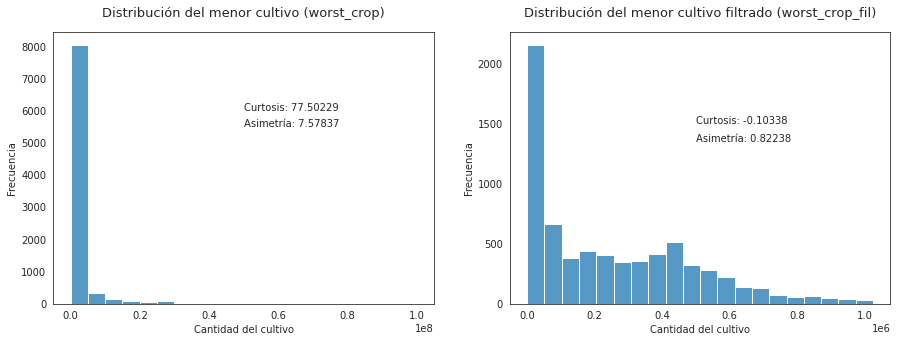

In [ ]:
sns.set_style('white')

fig,(ax1,ax2) = plt.subplots(nrows=1, ncols = 2, figsize = (15,5))
ax=sns.histplot(worst_crop_col, kde=False, bins=20, ax = ax1)
ax.set_title('Distribución del menor cultivo (worst_crop)', fontsize=13, pad=15);
ax.set(xlabel='Cantidad del cultivo', ylabel='Frecuencia');
ax1.text(x = 50_000_000, y = 6_000, s = f"Curtosis: {round(kurtosis(worst_crop_col),5)}")
ax1.text(x = 50_000_000, y = 5_500, s = f"Asimetría: {round(skew(worst_crop_col),5)}")

bx=sns.histplot(worst_crop_fil, kde=False, bins=20, ax = ax2)
bx.set_title('Distribución del menor cultivo filtrado (worst_crop_fil)', fontsize=13, pad=15);
bx.set(xlabel='Cantidad del cultivo', ylabel='Frecuencia');
ax2.text(x = 500_000, y = 1_500, s = f"Curtosis: {round(kurtosis(worst_crop_fil),5)}")
ax2.text(x = 500_000, y = 1_350, s = f"Asimetría: {round(skew(worst_crop_fil),5)}");

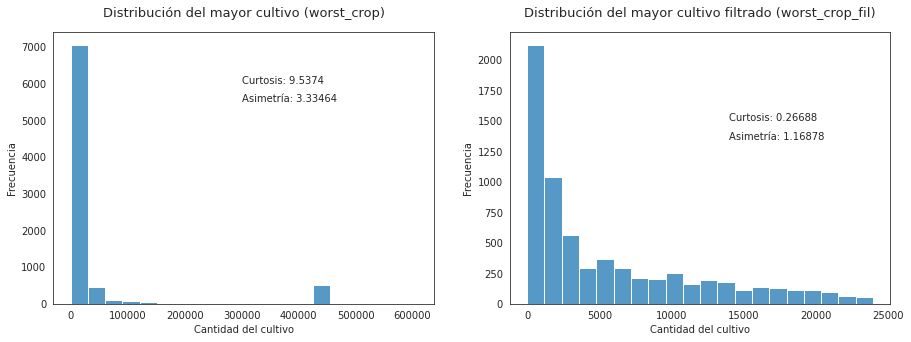

In [ ]:
fig,(ax1,ax2) = plt.subplots(nrows=1, ncols = 2, figsize = (15,5))
ax=sns.histplot(best_crop_col, kde=False, bins=20, ax = ax1)
ax.set_title('Distribución del mayor cultivo (worst_crop)', fontsize=13, pad=15);
ax.set(xlabel='Cantidad del cultivo', ylabel='Frecuencia');
ax1.text(x = 300_000, y = 6_000, s = f"Curtosis: {round(kurtosis(best_crop_col),5)}")
ax1.text(x = 300_000, y = 5_500, s = f"Asimetría: {round(skew(best_crop_col),5)}")

bx=sns.histplot(best_crop_fil, kde=False, bins=20, ax = ax2)
bx.set_title('Distribución del mayor cultivo filtrado (worst_crop_fil)', fontsize=13, pad=15);
bx.set(xlabel='Cantidad del cultivo', ylabel='Frecuencia');
ax2.text(x = 14_000, y = 1_500, s = f"Curtosis: {round(kurtosis(best_crop_fil),5)}")
ax2.text(x = 14_000, y = 1_350, s = f"Asimetría: {round(skew(best_crop_fil),5)}");

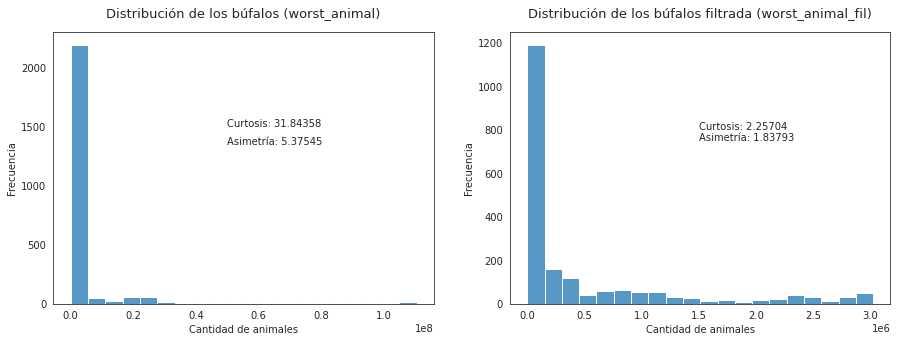

In [ ]:
fig,(ax1,ax2) = plt.subplots(nrows=1, ncols = 2, figsize = (15,5))
ax=sns.histplot(worst_animal_col, kde=False, bins=20, ax = ax1)
ax.set_title('Distribución de los búfalos (worst_animal)', fontsize=13, pad=15);
ax.set(xlabel='Cantidad de animales', ylabel='Frecuencia');
ax1.text(x = 50_000_000, y = 1_500, s = f"Curtosis: {round(kurtosis(worst_animal_col),5)}")
ax1.text(x = 50_000_000, y = 1_350, s = f"Asimetría: {round(skew(worst_animal_col),5)}")

bx=sns.histplot(worst_animal_fil, kde=False, bins=20, ax = ax2)
bx.set_title('Distribución de los búfalos filtrada (worst_animal_fil)', fontsize=13, pad=15);
bx.set(xlabel='Cantidad de animales', ylabel='Frecuencia');
ax2.text(x = 1_500_000, y = 800, s = f"Curtosis: {round(kurtosis(worst_animal_fil),5)}")
ax2.text(x = 1_500_000, y = 750, s = f"Asimetría: {round(skew(worst_animal_fil),5)}");

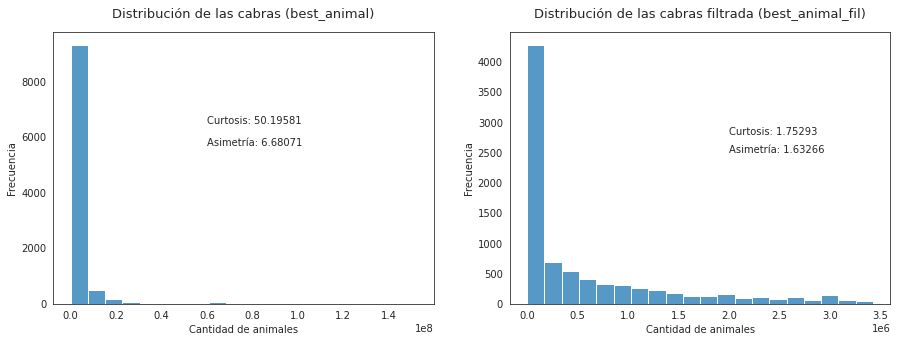

In [ ]:
fig,(ax1,ax2) = plt.subplots(nrows=1, ncols = 2, figsize = (15,5))
ax=sns.histplot(best_animal_col, kde=False, bins=20, ax = ax1)
ax.set_title('Distribución de las cabras (best_animal)', fontsize=13, pad=15);
ax.set(xlabel='Cantidad de animales', ylabel='Frecuencia');
ax1.text(x = 60_000_000, y = 6_500, s = f"Curtosis: {round(kurtosis(best_animal_col),5)}")
ax1.text(x = 60_000_000, y = 5_700, s = f"Asimetría: {round(skew(best_animal_col),5)}")

bx=sns.histplot(best_animal_fil, kde=False, bins=20, ax = ax2)
bx.set_title('Distribución de las cabras filtrada (best_animal_fil)', fontsize=13, pad=15);
bx.set(xlabel='Cantidad de animales', ylabel='Frecuencia');
ax2.text(x = 2_000_000, y = 2_800, s = f"Curtosis: {round(kurtosis(best_animal_fil),5)}")
ax2.text(x = 2_000_000, y = 2_500, s = f"Asimetría: {round(skew(best_animal_fil),5)}");

Todas las variables no son en absoluto similares a la distribución normal puesto que la distribución sólo tiene una cola derecha, podríamos hablar de distribuciones asimétricas positivas de cola larga.

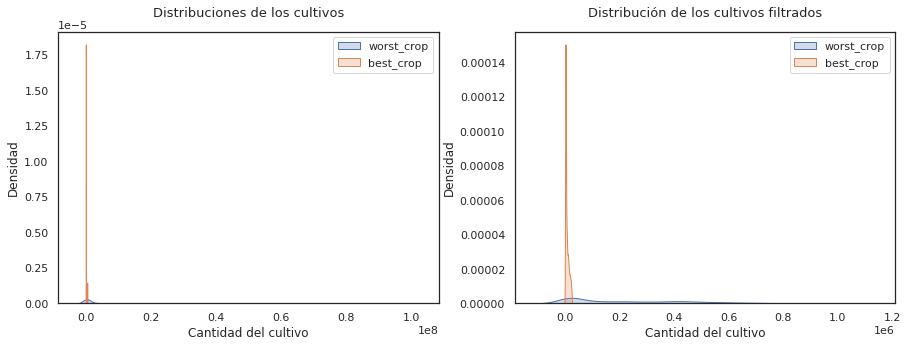

In [ ]:
sns.set(style='white')

fig,(ax1,ax2) = plt.subplots(nrows=1, ncols = 2, figsize = (15,5))
ax=sns.kdeplot(worst_crop_col, shade=True, ax = ax1, label = 'worst_crop') 
ax=sns.kdeplot(best_crop_col, shade=True, ax = ax1, label = 'best_crop') 
ax.set_title('Distribuciones de los cultivos', fontsize=13, pad=15);
ax.set(xlabel='Cantidad del cultivo', ylabel='Densidad');
ax.legend(loc=0)

bx=sns.kdeplot(worst_crop_fil, shade=True, ax = ax2, label = 'worst_crop') 
bx=sns.kdeplot(best_crop_fil, shade=True, ax = ax2, label = 'best_crop') 
bx.set_title('Distribución de los cultivos filtrados', fontsize=13, pad=15);
bx.set(xlabel='Cantidad del cultivo', ylabel='Densidad');
bx.legend(loc=0);

Ambas distribuciones son similares pero el pico del cultivo más estable (en naranja) es más alto y tiene una menor dispersión.

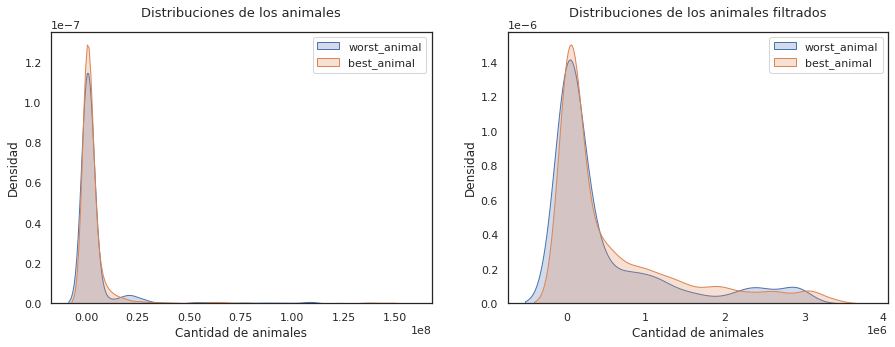

In [ ]:
fig,(ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
ax = sns.kdeplot(worst_animal_col, shade = True, ax = ax1, label = 'worst_animal') 
ax = sns.kdeplot(best_animal_col, shade = True, ax = ax1, label = 'best_animal') 
ax.set_title('Distribuciones de los animales', fontsize=13, pad=15);
ax.set(xlabel='Cantidad de animales', ylabel='Densidad');
ax.legend(loc=0)

bx = sns.kdeplot(worst_animal_fil, shade = True, ax = ax2, label = 'worst_animal') 
bx = sns.kdeplot(best_animal_fil, shade = True, ax = ax2, label = 'best_animal') 
bx.set_title('Distribuciones de los animales filtrados', fontsize=13, pad=15);
bx.set(xlabel='Cantidad de animales', ylabel='Densidad');
bx.legend(loc=0);

A pesar de que la especie más inestable fue la única que se vio afectada en el 2020, ambas distribuciones son muy parecidas, prácticamente se traslapan.

# Postwork 3

**Exploración de Variables Categóricas y Análisis Multivariable**

Ahora es momento de hacer análisis de variables categóricas y análisis multivariable. Realiza los siguientes pasos si tiene sentido aplicarlos a tu conjunto de datos:

- Si ya tienes gráficas realizadas en Postworks anteriores, agrega títulos, anotaciones y leyendas donde sea necesario. También cambia el tamaño de las gráficas donde tenga sentido hacerlo.
- Identifica todas las variables categóricas en tu dataset.
- Utiliza gráficas de barras para explorar la distribución de tus variables categóricas.
- Planea tu análisis multivariable: ¿qué combinaciones de variables categóricas podrían darme información útil acerca de la distribución de mis datos? ¿qué combinaciones de una variable numérica con una variable categórica podrían ser interesantes?
- Utiliza tablas de contingencia y múltiples gráficas en la misma figure para explorar combinaciones de variables categóricas.
- Utiliza boxplots y violinplots para explorar combinaciones de variables numéricas con variables categóricas.
- De preferencia ve registrando por escrito todos tus hallazgos. Describe qué vas descubriendo y qué podría significar.

En el caso de los datos de mejor y peor cultivo, las variables categóricas son `productivity` y `unit`. La primer columna muestra la productividad de los cultivos en términos del área cultivada, rendimiento y producción; y la columna `unit` presenta las unidades de medida por cada cultivo: hectárea (ha) en el caso de área cultivada, hectogramo por hectárea (hg/ha) para el rendimiento, y toneladas (tonnes) para la producción. Por lo tanto, basta con que analicemos una sola columna.

In [ ]:
worst_crop['productivity'].unique()

array(['area harvested', 'yield', 'production'], dtype=object)

In [ ]:
worst_crop['unit'].unique()

array(['ha', 'hg/ha', 'tonnes'], dtype=object)

En el datset de animales la columna categórica es `unit`. Esta columna indica las unidades con las que se cuenta el número de ejemplares de cada especie: por cabeza (head), millar de cabezas (1000 head) o número de ejemplares (No).

In [ ]:
animal['unit'].unique()

array(['head', '1000 head', 'no'], dtype=object)

Hacemos el conteo de nuestras variables categóricas para cada dataset:

In [ ]:
worst_crop_counts = worst_crop['productivity'].value_counts()

In [ ]:
best_crop_counts = best_crop['productivity'].value_counts()

In [ ]:
animal_counts = animal['unit'].value_counts()

Ahora generamos las gráficas de barras de los conteos:

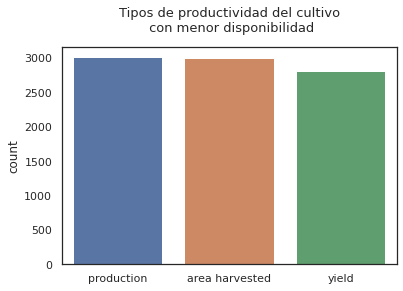

In [ ]:
ax = sns.barplot(x=worst_crop_counts.index, y=worst_crop_counts)
ax.set_title('Tipos de productividad del cultivo\n con menor disponibilidad', fontsize=13, pad=15)
ax.set(ylabel='count');

Podemos ver que área cultivada y producción tienen casi la misma cantidad de datos, aunque la mayoría de los datos está concentrada en la categoría de producción (3013 vs 3000). La producción hace referencia a la cantidad neta cosechada de un cultivo.

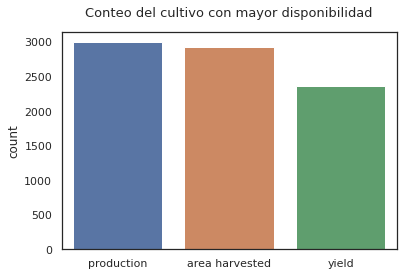

In [ ]:
bx = sns.barplot(x=best_crop_counts.index, y=best_crop_counts)
bx.set_title('Conteo del cultivo con mayor disponibilidad', fontsize=13, pad=15)
bx.set(ylabel='count');

En el conteo del cultivo con mayor disponibilidad tuvimos el mismo resultado que con `worst_crop`, la mayoría de los datos esta en la categoría de producción.

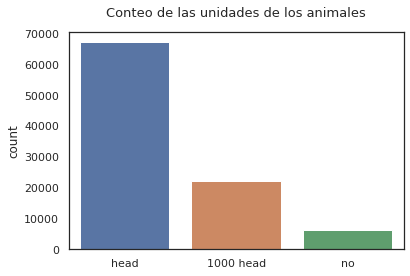

In [ ]:
cx = sns.barplot(x=animal_counts.index, y=animal_counts)
cx.set_title('Conteo de las unidades de los animales', fontsize=13, pad=15)
cx.set(ylabel='count');

Con respecto al conteo de los animales, podemos decir que la mayoría de los ejemplares se cuenta por cabeza.

Como no contamos con más variables categóricas en nuestro dataset de cultivos, lo que podemos hacer es considerar a los cultivos *sugar beet* y *nuts nes* como una nueva variable y utilizar una tabla de contingencia. Esta tabla nos da un resumen de las gráficas de barras anteriores.

In [ ]:
crop_new = crop[(crop["crop"]=="sugar beet") | (crop["crop"]=="nuts nes")]

In [ ]:
crosstab = pd.crosstab(crop_new['productivity'], crop_new['crop'])
crosstab

crop,nuts nes,sugar beet
productivity,,
area harvested,2927,3000
production,2999,3013
yield,2367,2814


A continuación, podemos observar los resultados de la tabla de contigencia de forma gráfica a través de las gráficas de barras. En la figura podemos ver que ambos cultivos tienen valores muy similares en cuanto al área cultivada y producción.

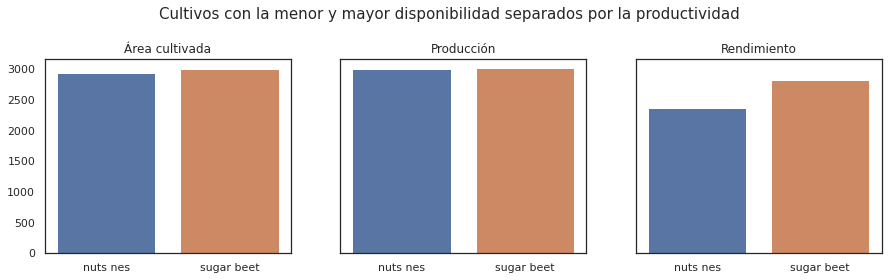

In [ ]:
fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(15, 4), sharex=True, sharey=True)

ax=sns.barplot(x=crosstab.columns, y=crosstab.loc['area harvested'], ax = ax1)
bx=sns.barplot(x=crosstab.columns, y=crosstab.loc['production'], ax = ax2)
cx=sns.barplot(x=crosstab.columns, y=crosstab.loc['yield'], ax=ax3)

ax.set(xlabel='', ylabel='', title='Área cultivada')
bx.set(xlabel='', ylabel='', title='Producción')
cx.set(xlabel='', ylabel='', title='Rendimiento')

fig.suptitle('Cultivos con la menor y mayor disponibilidad separados por la productividad', fontsize=15);
plt.subplots_adjust(top=0.8)

Ahora generaremos gráficas de boxplots y violinplots para ver la distribución de nuestros datos con respecto a la productividad.

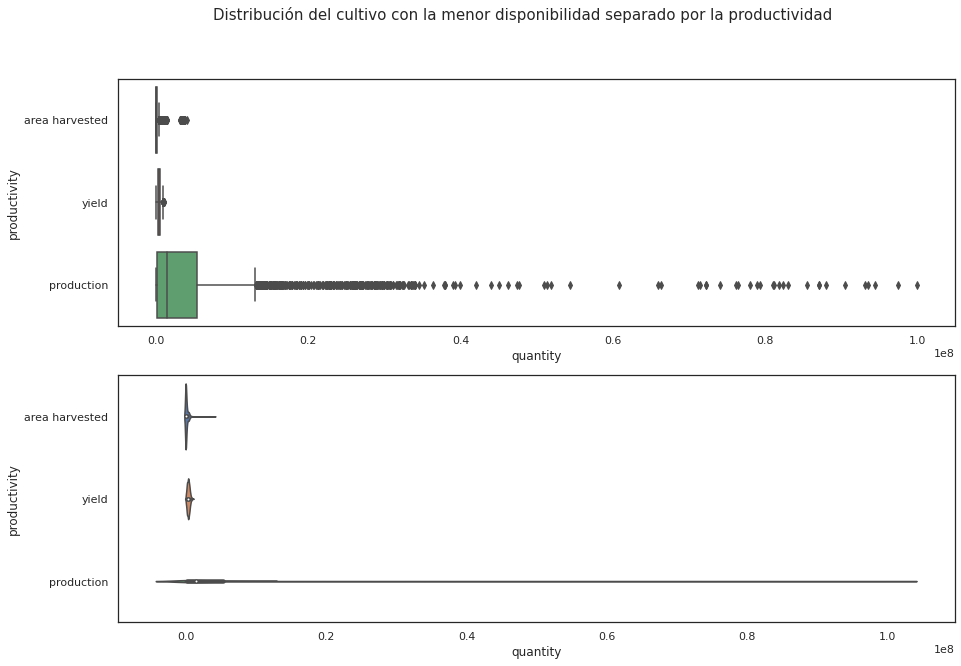

In [ ]:
fig,(ax1,ax2) = plt.subplots(nrows=2, ncols = 1, figsize = (15,10))

sns.boxplot(data=worst_crop, y='productivity', x='quantity', ax = ax1)
sns.violinplot(data=worst_crop, y='productivity', x='quantity', ax = ax2)

fig.suptitle('Distribución del cultivo con la menor disponibilidad separado por la productividad', fontsize=15);

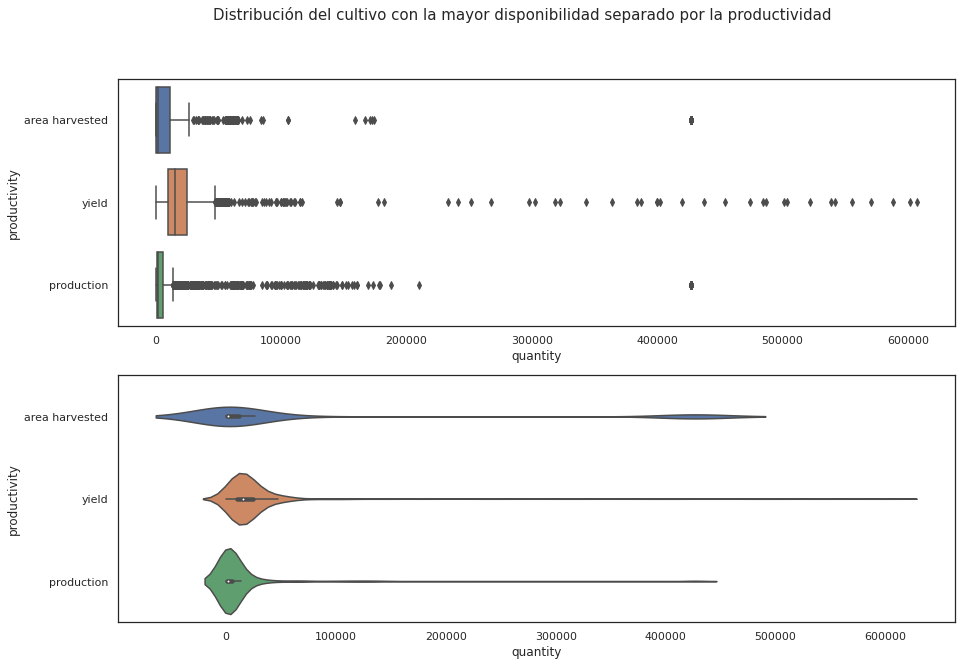

In [ ]:
fig,(ax1,ax2) = plt.subplots(nrows=2, ncols = 1, figsize = (15,10))

sns.boxplot(data=best_crop, y='productivity', x='quantity', ax = ax1)
sns.violinplot(data=best_crop, y='productivity', x='quantity', ax = ax2)

fig.suptitle('Distribución del cultivo con la mayor disponibilidad separado por la productividad', fontsize=15);

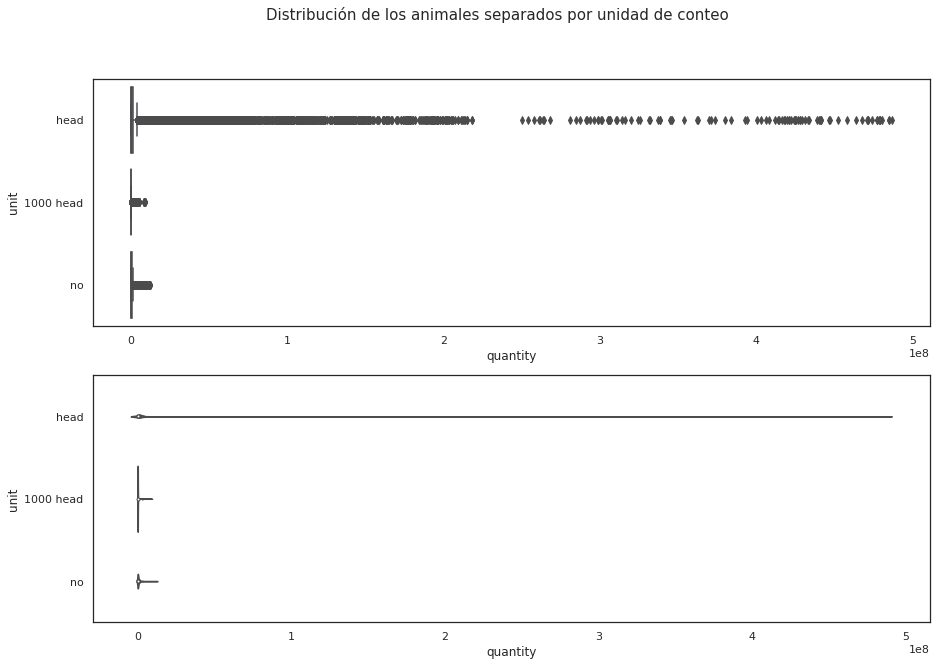

In [ ]:
fig,(ax1,ax2) = plt.subplots(nrows=2, ncols = 1, figsize = (15,10))

sns.boxplot(data=animal, y='unit', x='quantity', ax = ax1)
sns.violinplot(data=animal, y='unit', x='quantity', ax = ax2)

fig.suptitle('Distribución de los animales separados por unidad de conteo', fontsize=15);

Como podemos ver en las figuras, es un poco complicado obtener infomación acerca de la distribución de los datos debido a la dispersión de los valores en algunas categorías. Pero aún asi, podemos ver que los cultivos y los animales están concentrados en valores menores a 10,000,000. 

Ajustamos un poco los datos para poder observar mejor las características:

In [ ]:
worst_crop_new = worst_crop[worst_crop["quantity"]<7000000]

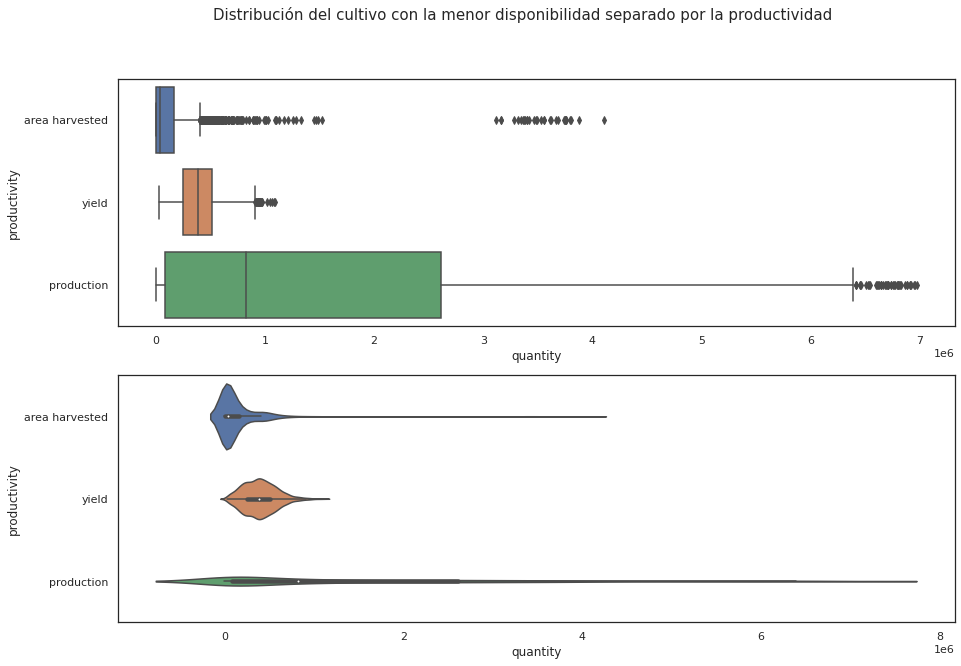

In [ ]:
fig,(ax1,ax2) = plt.subplots(nrows=2, ncols = 1, figsize = (15,10))

sns.boxplot(data=worst_crop_new, y='productivity', x='quantity', ax = ax1)
sns.violinplot(data=worst_crop_new, y='productivity', x='quantity', ax = ax2)

fig.suptitle('Distribución del cultivo con la menor disponibilidad separado por la productividad', fontsize=15);

In [ ]:
best_crop_new = best_crop[best_crop["quantity"]<50000]

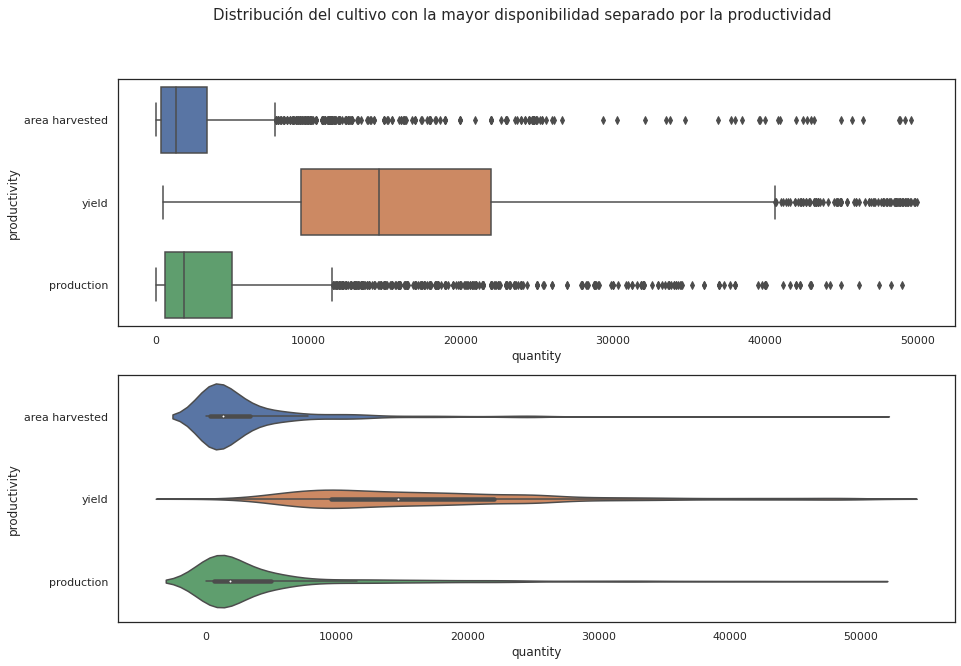

In [ ]:
fig,(ax1,ax2) = plt.subplots(nrows=2, ncols = 1, figsize = (15,10))

sns.boxplot(data=best_crop_new, y='productivity', x='quantity', ax = ax1)
sns.violinplot(data=best_crop_new, y='productivity', x='quantity', ax = ax2)

fig.suptitle('Distribución del cultivo con la mayor disponibilidad separado por la productividad', fontsize=15);

El cultivo con menor disponibilidad tiene los valores más grandes en producción, en cambio, el cultivo de *nuts nes* los tiene en la categoría de rendimiento.

In [ ]:
animal_new = animal[animal["quantity"]<200000]

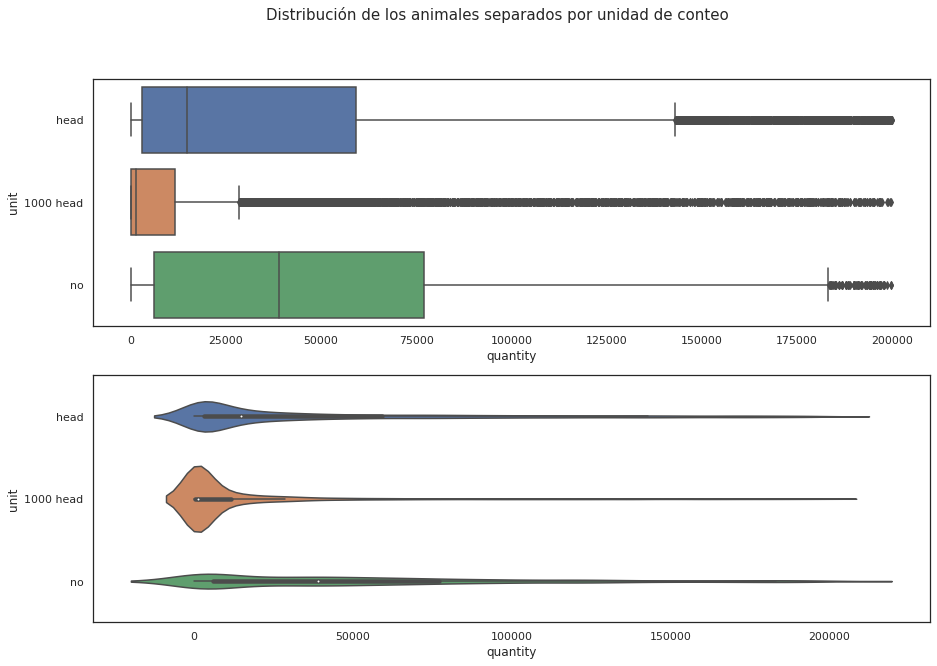

In [ ]:
fig,(ax1,ax2) = plt.subplots(nrows=2, ncols = 1, figsize = (15,10))

sns.boxplot(data=animal_new, y='unit', x='quantity', ax = ax1)
sns.violinplot(data=animal_new, y='unit', x='quantity', ax = ax2)

fig.suptitle('Distribución de los animales separados por unidad de conteo', fontsize=15);

Ahora que hemos limpiado un poco los datos de animales, podemos ver que la categoría de conteo por número de ejemplares tiene una distribución que tiende hacia los valores más grandes de cantidad. Sin embargo, ya conocemos que la mayoría de los animales del dataset se cuentan por cabeza.

# Postwork 4

**Correlaciones y Regresión Linear Simple**

- Identifica cuáles son las variables numéricas en tu dataset.
Asegúrate de que tengan el tipo de dato correcto y que no haya NaNs por ahí escondidos.
- Genera una matriz de correlaciones y un pairplot para visualizar de manera general las relaciones entre tus variables numéricas.
- Utilizando gráficas de dispersión y tus medidas de locación y dispersión, identifica dónde hay valores atípicos y decide qué hacer con ellos.
- Revisa si tu revisión de valores atípicos cambió de alguna manera las relaciones existentes.
- Donde consideres necesario, entrena modelos de Regresión Lineal con un o más pares de variables. Incluso si no te parece que realizar predicciones entre pares de variables tiene sentido para tu proyecto, prueba realizar un par de regresiones para que practiques el procedimiento.

Como en nuestro dataset no contamos con muchas variables númericas, compararemos la productividad de los cultivos en el año 2020, con el fin de descubrir la relación que existe entre el área cosechada, el rendimiento y la producción. A continuación construimos el dataset que usaremos:

In [ ]:
crop_2020 = crop[crop['year']==2020]
crop_area = crop_2020[crop_2020['productivity']=='area harvested']
crop_yield = crop_2020[crop_2020['productivity']=='yield']
crop_production = crop_2020[crop_2020['productivity']=='production']

In [ ]:
mean_area = pd.DataFrame(crop_area.groupby(['crop'])['quantity'].mean())
mean_yield = pd.DataFrame(crop_yield.groupby(['crop'])['quantity'].mean())
mean_production = pd.DataFrame(crop_production.groupby(['crop'])['quantity'].mean())

In [ ]:
crop_mean = pd.concat([mean_area, mean_yield, mean_production], axis = 1, join = "inner", ignore_index=True)
crop_mean = crop_mean.rename(columns={0:'area', 1:'yield', 2:'production'})

In [ ]:
crop_mean

,area,yield,production
crop,,,
"almonds, with shell",3.936685e+04,28995.853659,7.322944e+04
"anise, badian, fennel, coriander",8.881241e+04,22277.454545,1.018700e+05
apples,7.403642e+04,171227.454545,1.422374e+06
apricots,7.537151e+03,64201.548387,5.085651e+04
artichokes,3.202562e+03,143343.523810,4.413444e+04
...,...,...,...
"vegetables, fresh nes",1.676827e+05,128863.460674,2.520473e+06
"vegetables, leguminous nes",4.618340e+03,83228.829268,2.838031e+04
"walnuts, with shell",3.229032e+04,31215.069767,9.405872e+04


Generamos la matriz de correlaciones para visualizar la relación existente en las categorías de la productividad:

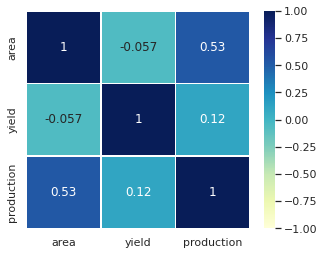

In [ ]:
plt.figure(figsize=(5, 4))
ax = sns.heatmap(crop_mean.corr(), vmin=-1, vmax=1, annot=True, cmap="YlGnBu", linewidths=.5);

Como podemos ver, el valor de la correlación más alto que tenemos es de 0.53, por lo que podemos decir que hay relación entre la producción y el área cosechada. Esto lo podemos verificar en las gráficas de dispersión:

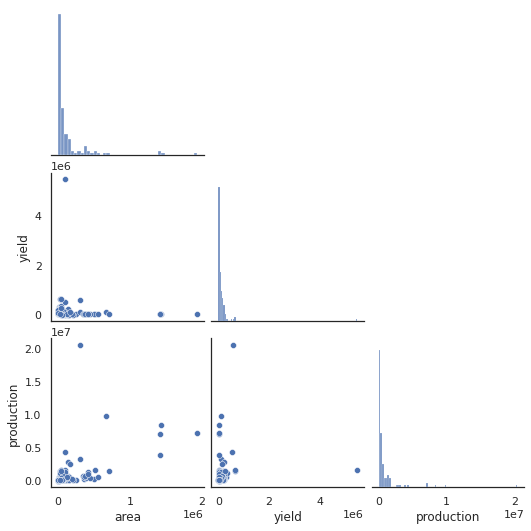

In [ ]:
sns.pairplot(data=crop_mean, corner = True)

Las variables que nos interesa analizar son el área cosechada y la producción, por lo que podemos ver con más detalle la gráfica de dispersión entre dichas categorías:

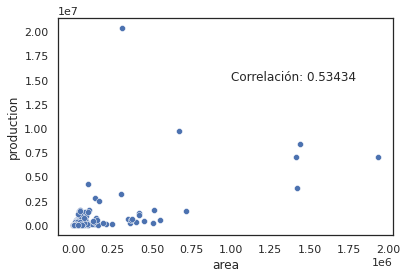

In [ ]:
ax = sns.scatterplot(x=crop_mean['area'], y=crop_mean['production']);
ax.text(x = 1_000_000, y = 15_000_000, s = f"Correlación: {round(crop_mean['area'].corr(crop_mean['production']),5)}");

A partir de la gráfica podemos observar que tenemos algunos valores atípicos que pueden estar afectando la correlación. Veamos qué pasa si removemos esos valores:

In [ ]:
area_filt = crop_mean['area'] < 1000000
production_filt = crop_mean['production'] < 7500000
crop_mean_filt = crop_mean[area_filt & production_filt]

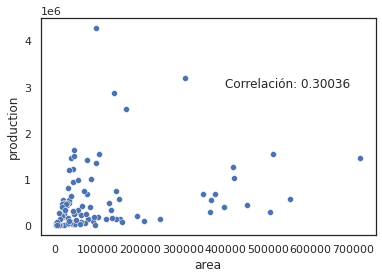

In [ ]:
ax = sns.scatterplot(x=crop_mean_filt['area'], y=crop_mean_filt['production']);
ax.text(x = 400_000, y = 3_000_000, s = f"Correlación: {round(crop_mean_filt['area'].corr(crop_mean_filt['production']),5)}");

En este caso, el coeficiente de correlación no mejoró, si no que todo lo contrario. Esto nos da un indicio de que la relación entre estas dos variables es bastante débil (si es que existe). Ahora podemos intentar ver si la relación mejora si eliminamos los valores atípicos usando el score de Rango Intercuartílico. 

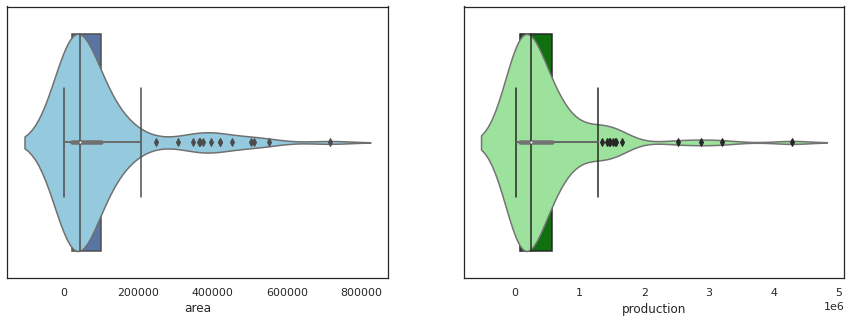

In [ ]:
fig,(ax1,ax2) = plt.subplots(nrows=1, ncols = 2, figsize = (15,5))

sns.boxplot(data = crop_mean_filt, x = 'area', ax = ax1)
sns.violinplot(data = crop_mean_filt, x = 'area', ax = ax1, color='skyblue')

sns.boxplot(data = crop_mean_filt, x = 'production', ax = ax2, color='green')
sns.violinplot(data = crop_mean_filt, x = 'production', ax = ax2, color='lightgreen')

In [ ]:
iqr_area = crop_mean_filt['area'].quantile(0.75) - crop_mean_filt['area'].quantile(0.25)
upper_outliers_area = crop_mean_filt['area'] < (crop_mean_filt['area'].quantile(0.75) + iqr_area * 1.0)

iqr_production = crop_mean_filt['production'].quantile(0.75) - crop_mean_filt['production'].quantile(0.25)
upper_outliers_production = crop_mean_filt['production'] < (crop_mean_filt['production'].quantile(0.75) + iqr_production * 1.0)

crop_mean_filt2 = crop_mean_filt[upper_outliers_area & upper_outliers_production]

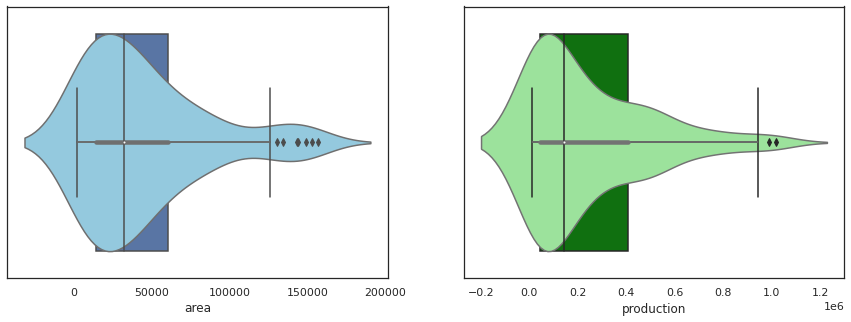

In [ ]:
fig,(ax1,ax2) = plt.subplots(nrows=1, ncols = 2, figsize = (15,5))

sns.boxplot(data = crop_mean_filt2, x = 'area', ax = ax1)
sns.violinplot(data = crop_mean_filt2, x = 'area', ax = ax1, color='skyblue')

sns.boxplot(data = crop_mean_filt2, x = 'production', ax = ax2, color='green')
sns.violinplot(data = crop_mean_filt2, x = 'production', ax = ax2, color='lightgreen')

In [ ]:
crop_mean_filt2['area'].corr(crop_mean_filt2['production'])

0.24570407402750083

La correlación disminuyó a 0.2457 cuando eliminamos los valores que creemos que son erróneos. Lo cual nos hace pensar que tal vez no existe relación alguna entre las variables, o que solo para algunos cultivos la producción va de la mano del área cosechada.


A pesar que sabemos que puede que no exista relación alguna entre la producción y el área cosechada, entrenaremos un modelo de Regresión Lineal con esas variables. La variable independiente será el área cosechada, y la dependiente, la producción.

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

serie_1 = crop_mean['area']
serie_2 = crop_mean['production']

# Entrenamiento del modelo
lr.fit(serie_1.to_frame(), serie_2)

LinearRegression()

In [ ]:
# Predicción con el modelo entrenado
y_predict = lr.predict(serie_1.to_frame())

Obtenemos la ecuación y el coeficiente de determinación de nuestro modelo entrenado:

In [ ]:
intercept = lr.intercept_
coefficient = lr.coef_[0]
r2_score = lr.score(serie_1.to_frame(), serie_2)

Por último, graficamos nuestros datos originales y la función de los valores predichos:

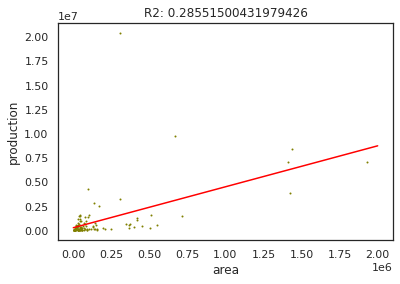

In [ ]:
x_points = np.linspace(0,2000000, 100)
y_line_predict = coefficient*x_points + intercept

plt.plot(x_points, y_line_predict, color = 'red')
plt.scatter(serie_1, serie_2, s = 1, color = 'olive')
plt.title(f"R2: {r2_score}")
plt.xlabel("area");
plt.ylabel("production");

Era de esperarse que obtendríamos un bajo coeficiente de determinación. Lo cual significa que no se puede predecir la producción a partir del área cultivada por medio de un modelo de regresión lineal. O que en realidad, estas variables no estan relacionadas entre sí.

# Postwork 5

**Distribuciones muestrales y técnicas de evaluación de modelos**

- Identifica las variables numéricas en tu dataset y revisa las medidas de locación y dispersión que ya has realizado de ellas.
- Utilizando la técnica de bootstrap, explora las distribuciones muestrales de las estadísticas que obtuviste anteriormente y reporta:
  - La distribución, su asimetría y curtosis
  - El error estándar
  - El intervalo de confianza que te parezca más apropiado

- Elige algunas de tus variables numéricas para entrenar uno o más modelos de Regresión Lineal Múltiple. Utiliza las técnicas de división de dataset y validación cruzada de K-iteraciones para asegurarte de que tu modelo generalice.


Aplicaremos la técnica de bootstrap a nuestros datos ya filtrados de cultivos con mayor y menor disponibilidad, en donde haremos 100 000 remuestreos, cada uno de 5 elementos. 

In [ ]:
means = []

for i in range(100_000):
    sample = worst_crop_fil.sample(n=5, replace=True)
    means.append(sample.mean())
    
serie_means_worst = pd.Series(means)

In [ ]:
means_b = []

for i in range(100_000):
    sample = best_crop_fil.sample(n=5, replace=True)
    means_b.append(sample.mean())
    
serie_means_best = pd.Series(means_b)

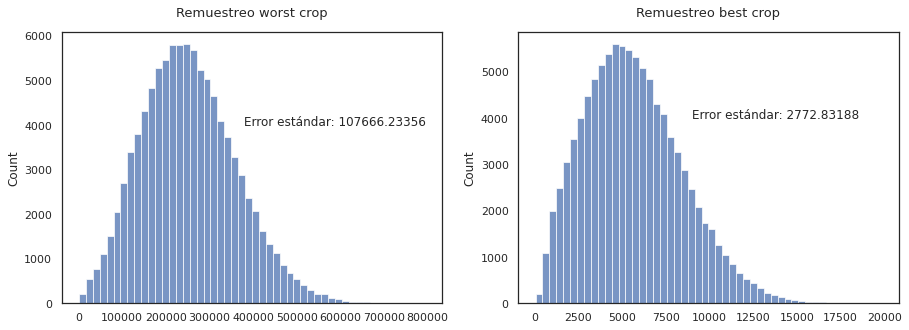

In [ ]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols = 2, figsize = (15,5))

sns.histplot(x = serie_means_worst, bins = 50, ax = ax1)
sns.histplot(x = serie_means_best, bins = 50, ax = ax2)

ax1.set_title('Remuestreo worst crop', fontsize=13, pad=15);
ax2.set_title('Remuestreo best crop', fontsize=13, pad=15);

ax1.text(x = 380_000, y = 4_000, s = f"Error estándar: {round(serie_means_worst.std(),5)}");
ax2.text(x = 9_000, y = 4_000, s = f"Error estándar: {round(serie_means_best.std(),5)}");

Ahora calcularemos qué tan cerca de la normalidad están nuestros promedios muestrales:

In [ ]:
print("Para el cultivo de menor disponiblidad:")
print(f"Curtosis: {round(kurtosis(serie_means_worst),5)}")
print(f"Asimetría: {round(skew(serie_means_worst),5)}")

Para el cultivo de menor disponiblidad:
Curtosis: 0.00155
Asimetría: 0.37507


In [ ]:
print("Para el cultivo de mayor disponiblidad:")
print(f"Curtosis: {round(kurtosis(serie_means_best),5)}")
print(f"Asimetría: {round(skew(serie_means_best),5)}")

Para el cultivo de mayor disponiblidad:
Curtosis: 0.0231
Asimetría: 0.51237


En ambos cultivos tenemos una asímetria positiva, lo cual significa que las distribuciones se alargan a la derecha a valores mayores que la media. Por lo mismo, tenemos valores muy bajos en la curtosis, ya que los datos están alejados de la media.

Obtenemos los intervalos de confianza:

In [ ]:
def intervalo_de_confianza(series, confianza):
    alpha = round((1-confianza)/2,5)
    limite_inf = series.quantile(alpha)
    limite_sup = series.quantile(1 - alpha)
    print(f"Intervalo de {confianza * 100}% de confianza: {round(limite_inf, 5)} < {round(series.mean(), 5)} < {round(limite_sup, 5)}")

In [ ]:
print("Para el cultivo de menor disponiblidad:")
intervalo_de_confianza(series = serie_means_worst, confianza=0.90)
intervalo_de_confianza(series = serie_means_worst, confianza=0.95)
intervalo_de_confianza(series = serie_means_worst, confianza=0.99)

Para el cultivo de menor disponiblidad:
Intervalo de 90.0% de confianza: 87269.15 < 252398.25063 < 441161.41
Intervalo de 95.0% de confianza: 63095.695 < 252398.25063 < 481393.405
Intervalo de 99.0% de confianza: 25891.283 < 252398.25063 < 562169.91


In [ ]:
print("Para el cultivo de mayor disponiblidad:")
intervalo_de_confianza(series = serie_means_best, confianza=0.90)
intervalo_de_confianza(series = serie_means_best, confianza=0.95)
intervalo_de_confianza(series = serie_means_best, confianza=0.99)

Para el cultivo de mayor disponiblidad:
Intervalo de 90.0% de confianza: 1533.8 < 5644.88019 < 10623.84
Intervalo de 95.0% de confianza: 1113.795 < 5644.88019 < 11683.61
Intervalo de 99.0% de confianza: 618.999 < 5644.88019 < 13767.033


Entrenaremos un modelo de Regresión Lineal Múltiple usando los datos de cultivos, para conocer si existe alguna relación entre las categorías de productividad a lo largo del tiempo. Para esto, agruparemos la cantidad de cultivos por año y por tipo de producción.

In [ ]:
crop_area2 = crop[crop['productivity']=='area harvested']
crop_yield2 = crop[crop['productivity']=='yield']
crop_production2 = crop[crop['productivity']=='production']

In [ ]:
mean_area2 = pd.DataFrame(crop_area2.groupby(['year'])['quantity'].mean())
mean_yield2 = pd.DataFrame(crop_yield2.groupby(['year'])['quantity'].mean())
mean_production2 = pd.DataFrame(crop_production2.groupby(['year'])['quantity'].mean())

In [ ]:
crop_mean_year = pd.concat([mean_area2, mean_yield2, mean_production2], axis = 1, join = "inner", ignore_index=True)
crop_mean_year = crop_mean_year.rename(columns={0:'area', 1:'yield', 2:'production'})

Generamos la matriz de correlaciones para ver si existe relación entre las variables:

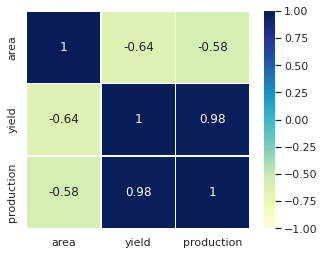

In [ ]:
plt.figure(figsize=(5, 4))
ax = sns.heatmap(crop_mean_year.corr(), vmin=-1, vmax=1, annot=True, cmap="YlGnBu", linewidths=.5);

Podemos ver que existe una correlación negativa entre el área cultivada y la producción; y entre el área y el rendimiento. Lo cual quiere decir que la producción y el rendimieto disminuyen cuando el área cultivada aumenta.

Obtenemos las gráficas de boxplots y violinplots para revisar si tenemos que realizar alguna limpieza en los datos:

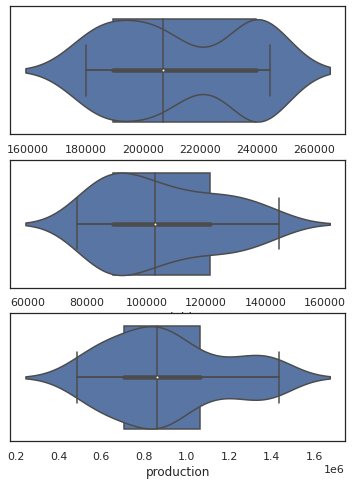

In [ ]:
fig,(ax1,ax2,ax3) = plt.subplots(nrows=3, ncols = 1, figsize = (6,8))

sns.boxplot(data = crop_mean_year, x = 'area', ax = ax1)
sns.violinplot(data = crop_mean_year, x = 'area', ax = ax1)

sns.boxplot(data = crop_mean_year, x = 'yield', ax = ax2)
sns.violinplot(data = crop_mean_year, x = 'yield', ax = ax2)

sns.boxplot(data = crop_mean_year, x = 'production', ax = ax3)
sns.violinplot(data = crop_mean_year, x = 'production', ax = ax3)

A continuación, creamos nuestros modelos de regresión lineal:

In [ ]:
# Creamos un vector con las variables
var = ['area', 'yield', 'production']

# Creamos los modelos lineales
from sklearn.linear_model import LinearRegression

lr_split = LinearRegression()
lr_cv = LinearRegression() # modelo de validación cruzada

In [ ]:
# Separamos las variables en independientes y dependientes
# Independiente, yield y production
# Dependiente, area
X = crop_mean_year[var[1:]]
y = crop_mean_year[var[0]]

Llevamos a cabo el entrenamiento del modelo:

In [ ]:
from sklearn.model_selection import train_test_split
X_training, X_test, y_training, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# Entrenamiento
lr_split.fit(X_training, y_training)

# Score
lr_split.score(X_test, y_test)

0.39841422237458135

In [ ]:
# Aplicamos la validación cruzada
from sklearn.model_selection import cross_validate
scores = cross_validate(lr_cv, X, y, scoring='r2')
scores

{'fit_time': array([0.00497651, 0.00319743, 0.00299144, 0.00191474, 0.00187325]),
 'score_time': array([0.00268483, 0.00264049, 0.00153685, 0.00147128, 0.00143075]),
 'test_score': array([-132.83067699,  -81.21358616,  -12.82175522,  -32.9137711 ,
         -66.81871734])}

In [ ]:
print(f'Score del modelo: {scores["test_score"].mean():.3f} +/- {scores["test_score"].std():.3f}')

Score del modelo: -65.320 +/- 41.518


# Postwork 6

**Visualización de datos avanzada**

Revisa con detenimiento si hay alguna buena razón para utilizar en tu proyecto alguna de las gráficas que aprendimos hoy.

- Si hay relaciones jerárquicas que quieras hacer claras o si quieres explorar las proporciones de una variable numérica agrupada en múltiples niveles utiliza un treemap.
- Si quieres explorar la relación entre dos variables numéricas divididas por una variable categórica, utiliza scatterplots por categorías o scatterplots con variables condicionantes.
- Si quieres explorar la relación entre dos variables numéricas pero tu dataset es tan grande que es imposible definir las densidades de tus datos, utiliza un binning hexagonal.
- Si quieres explorar datos geográficos, como definir regiones o puntos en un mapa o visualizar una variable numérica que puede segmentarse por regiones geográficas, utiliza un mapa cloroplético.
- Si quieres explorar una variable numérica agrupada en dos niveles por variables categóricas, utiliza una gráfica de barras apiladas.

Nuestro dataset tiene datos geográficos, ya que tenemos la información de cantidad de cultivos y animales por pais y por años. Por lo que aprovecharemos para visualizar la cantidad de cultivos y animales por pais durante el año 2020.

In [ ]:
crop_2020 = crop[crop['year']==2020]
mean_2020 = pd.DataFrame(crop_2020.groupby(['country'])['quantity'].mean())

# Tomamos el índice como una columna
mean_2020 = mean_2020.reset_index()

Para la gráfica, renombraremos cada pais usando el código ISO 3166-1 alfa-3 mediate el módulo `pycountry`:

In [ ]:
!pip install pycountry

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.1 MB 29.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681845 sha256=7beeb7f841721fa22de3c3956201bee7b1487f5d563fc676b666507b05749037
  Stored in directory: /root/.cache/pip/wheels/0e/06/e8/7ee176e95ea9a8a8c3b3afcb1869f20adbd42413d4611c6eb4
Successfully built pycountry


Creamos la función para cambiar el nombre completo del país por su código de tres letras (alfa-3).

In [ ]:
import pycountry

def get_alpha_3(country):
  try:
    return pycountry.countries.get(name=country).alpha_3
  except:
    return None

Creamos una nueva columna (`code`) donde estarán los códigos del país:

In [ ]:
mean_2020['code'] = mean_2020['country'].apply(get_alpha_3)

In [ ]:
mean_2020.head()

,country,quantity,code
0,Afghanistan,187662.696970,AFG
1,Albania,79038.416667,ALB
2,Algeria,232638.483444,DZA
3,Angola,339464.580247,AGO
4,Antigua And Barbuda,21230.777778,ATG


Por último, hacemos el mapa cloroplético usando los datos de la cantidad de cultivo:

In [ ]:
import plotly.express as px

fig = px.choropleth(mean_2020, locations='code',
                    color='quantity', 
                    hover_name='country',
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.show()

En el mapa podemos ver que los países con la mayor cantidad de producción de cultivos durante la pandemia fueron Brasil y China. 

Ahora graficamos la cantidad de animales por país:


In [ ]:
animal_2020 = animal[animal['year']==2020]
animal_mean_2020 = pd.DataFrame(animal_2020.groupby(['country'])['quantity'].mean())

# Tomamos el índice como una columna
animal_mean_2020 = animal_mean_2020.reset_index()

In [ ]:
animal_mean_2020['code'] = animal_mean_2020['country'].apply(get_alpha_3)

In [ ]:
import plotly.express as px

fig = px.choropleth(animal_mean_2020, locations='code',
                    color='quantity', 
                    hover_name='country',
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.show()

China es uno de los países con mayor número de animales disponibles para consumo alimentario durante la pandemia; seguido de la India y Brasil. Por otro lado, podemos ver que Chile, Paraguay, y algunos paises del continente africano como: Angola y Nigeria; resultaron ser los más afectados en cuanto a la disponibilidad de animales.